Dataset: https://www.kaggle.com/mustafaali96/weight-height

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

In [17]:
df = pd.read_csv('weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


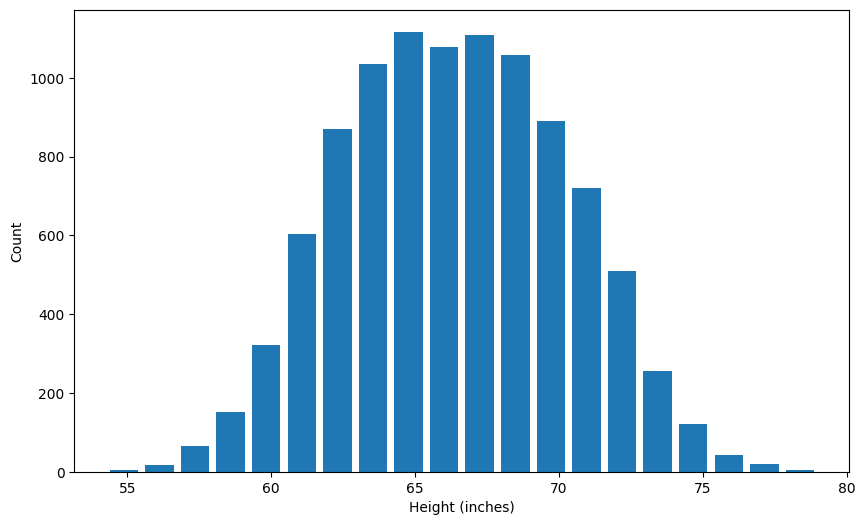

In [18]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)
plt.hist(df.Height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

Normal distribution, Bell curve and Standard deviation: https://www.mathsisfun.com/data/standard-normal-distribution.html

Plot bell curve along with histogram for our dataset

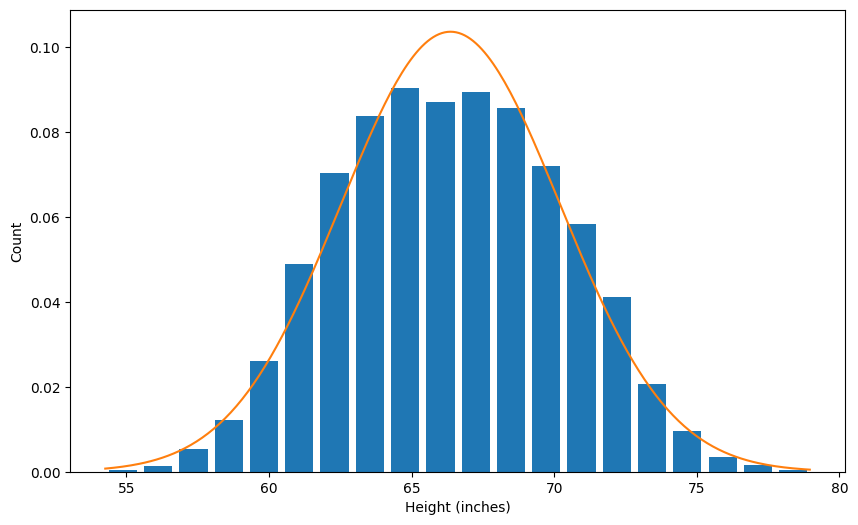

In [19]:

plt.hist(df.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.Height.min(), df.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.Height.mean(),df.Height.std()))

In [20]:
print(df.Height.mean())
print(df.Height.std())

66.36755975482124
3.8475281207732293


## (1) Outlier detection and removal using 3 standard deviation:

One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean. Which means we can come up with following upper and lower bounds.

In [21]:
upper_limit = df.Height.mean() + 3 * df.Height.std()
upper_limit

77.91014411714093

In [22]:
lower_limit = df.Height.mean() - 3 * df.Height.std()
lower_limit

54.82497539250156

Here are the outliers that are beyond 3 std dev from mean

In [23]:
df[(df.Height > upper_limit) | (df.Height < lower_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


Above the heights on higher end is **78 inch** which is around **6 ft 6 inch**. Now that is quite unusual height. There are people who have this height but it is very uncommon and it is ok if you remove those data points. Similarly on lower end it is **54 inch** which is around **4 ft 6 inch**. While this is also a legitimate height but you don't find many people having this height so it is safe to consider both of these cases as outliers.

### Remove these outliers

In [24]:
df_no_outlier_std_dev = df[(df.Height < upper_limit) & (df.Height > lower_limit)]
df_no_outlier_std_dev

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


## (2) Outlier detection and removal using Z Score:

* Z score is a way to achieve same thing that we did above in part (1)
* Z score indicates how many standard deviation away a data point is.

  * For example in our case mean is 66.37 and standard deviation is 3.84.
  * If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

### Calculate the Z Score

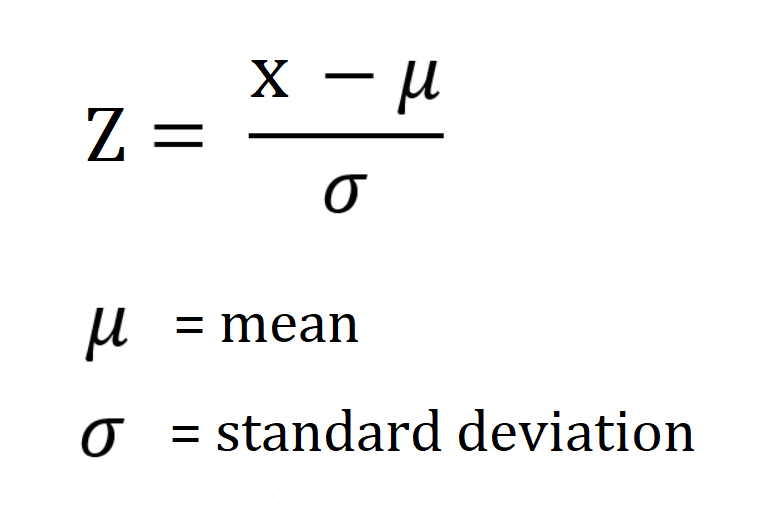

In [25]:
df['Zscore'] = ( df.Height - df.Height.mean() ) / df.Height.std()
df

,Gender,Height,Weight,Zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090


Above for first record with height 73.84, Z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean

In [26]:
(73.84-66.37)/3.84

1.9453124999999998

* Get data points that has Z score higher than 3 or lower than -3. 
* Another way of saying same thing is get data points that are more than 3 standard deviation away.

In [27]:
df[df['Zscore'] > 3]

,Gender,Height,Weight,Zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [28]:
df[df['Zscore'] < -3]

,Gender,Height,Weight,Zscore
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [29]:
df[(df.Zscore < -3) | (df.Zscore > 3)]

,Gender,Height,Weight,Zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


## Remove the outliers and produce new dataframe

In [31]:
df_no_outliers = df[(df.Zscore > -3) & (df.Zscore < 3)]
df_no_outliers

,Gender,Height,Weight,Zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090
